Importing Libraries

In [55]:
import csv
import random
import math
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import seaborn as sns

Step 1: Load the data

In [40]:
def load_dataset(filename, split_ratio):
    training_set = []
    testing_set = []
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        header = dataset[0]  # Store the header
        dataset = dataset[1:]  # Remove the header from the dataset
        for row in dataset:
            # Convert numerical attributes to float
            data_row = [float(val) for val in row[:-1]]
            # Encode 'Service' variable
            service_label = 1 if row[-1] == 'Yes' else 0
            data_row.append(service_label)
            if random.random() < split_ratio:
                training_set.append(data_row)
            else:
                testing_set.append(data_row)
    return training_set, testing_set

Step 2: Define the distance metric (Euclidean distance)

In [41]:
def euclidean_distance(instance1, instance2, length):
    distance = 0
    for i in range(length):
        distance += pow((instance1[i] - instance2[i]), 2)
    return math.sqrt(distance)

Step 3: Implement the kNN algorithm

In [42]:
def k_nearest_neighbors(training_set, test_instance, k):
    distances = []
    length = len(test_instance) - 1
    for x in range(len(training_set)):
        dist = euclidean_distance(test_instance, training_set[x], length)
        distances.append((training_set[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [43]:
def predict_class(neighbors):
    class_votes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in class_votes:
            class_votes[response] += 1
        else:
            class_votes[response] = 1
    sorted_votes = sorted(class_votes.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_votes[0][0]


Step 4: Evaluate the model

In [48]:
def get_accuracy(testing_set, predictions):
    correct = 0
    for x in range(len(testing_set)):
        if testing_set[x][-1] == predictions[x]:
            correct += 1
    return (correct / float(len(testing_set))) * 100.0

Load dataset and make predictions

In [49]:
filename = 'TrainData.csv'
split_ratio = 0.67
training_set, testing_set = load_dataset(filename, split_ratio)
predictions = []
k = 3
for x in range(len(testing_set)):
    neighbors = k_nearest_neighbors(training_set, testing_set[x], k)
    result = predict_class(neighbors)
    predictions.append(result)
accuracy = get_accuracy(testing_set, predictions)
print('Accuracy:', accuracy)

Accuracy: 100.0


Confusion Matrix

In [50]:
true_labels = [row[-1] for row in testing_set]
conf_matrix = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[77  0]
 [ 0 17]]


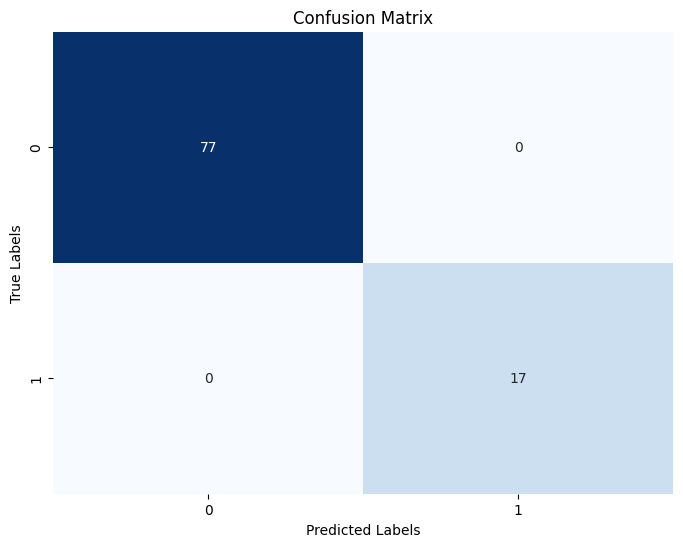

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Correlation Matrix

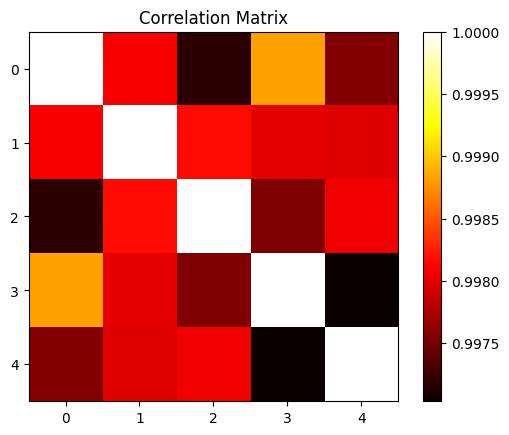

In [57]:
# Correlation Matrix
data = np.array([row[:-1] for row in training_set])  # Exclude the last column (Service)
correlation_matrix = np.corrcoef(data.T)
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

AUC Curve and ROC Curve

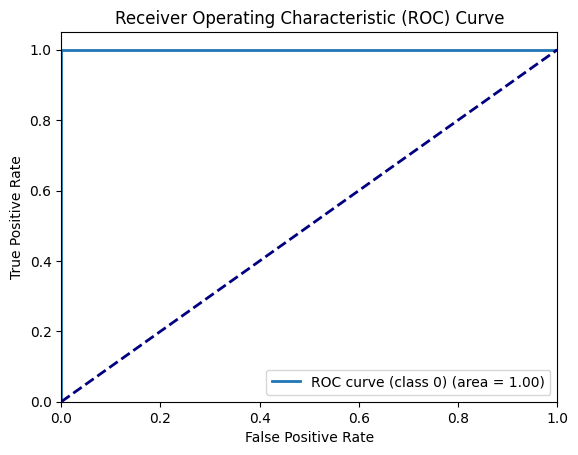

In [52]:
y_true = label_binarize(true_labels, classes=[0, 1])
y_scores = label_binarize(predictions, classes=[0, 1])
n_classes = y_true.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve (class {}) (area = {:.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Print model accuracy

In [53]:
print('Model Accuracy:', accuracy)

Model Accuracy: 100.0
